**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   EQUIPO: 42
*   NOMBRE: Javier Alejandro Pérez Garza
*   MATRÍCULA: A01284386
*   NOMBRE: Marco Antonio Corona Ruiz
*   MATRÍCULA: A01370358
*   NOMBRE: Emiliano Saucedo Arriola
*   MATRÍCULA: A01659258
*   NOMBRE: César Miguel Barrientos Robles
*   MATRÍCULA: A01796615

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#import os
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 9/"
#DIR = "/content/drive/MyDrive/MNA/TC4029/Semana 9/"
# DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/Ciencia y Analitica de Datos/Actividad 9"
#os.chdir(DIR)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [9]:
data_df.set_index('id', inplace=True)

In [10]:
data_df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678




1a) Estadísticas descriptivas para todas las variables del dataframe.

In [11]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [12]:
data_df.describe(include='object').T

,count,unique,top,freq
diagnosis,569,2,B,357


1b) Valores únicos por variable para identificar posibles variables categóricas.

In [13]:
pd.DataFrame(data_df.nunique(), columns=['Valores únicos'])

,Valores únicos
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542
symmetry_mean,432


1c) Búsqueda de valores faltantes.

In [14]:
data_df.isna().sum()
# data_df.isna().sum()[data_df.isna().sum()> 0 ]

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

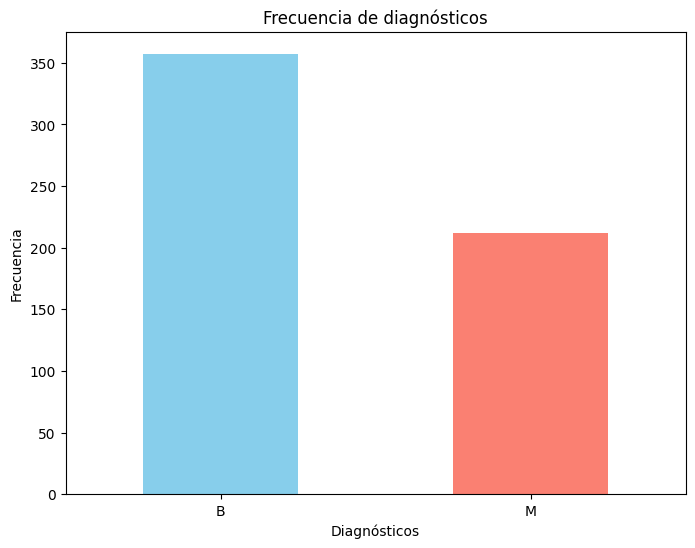

In [15]:
plt.figure(figsize=(8, 6))
data_df['diagnosis'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Frecuencia de diagnósticos')
plt.xlabel('Diagnósticos')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

In [16]:
correlation_matrix = data_df.corr(numeric_only=True)

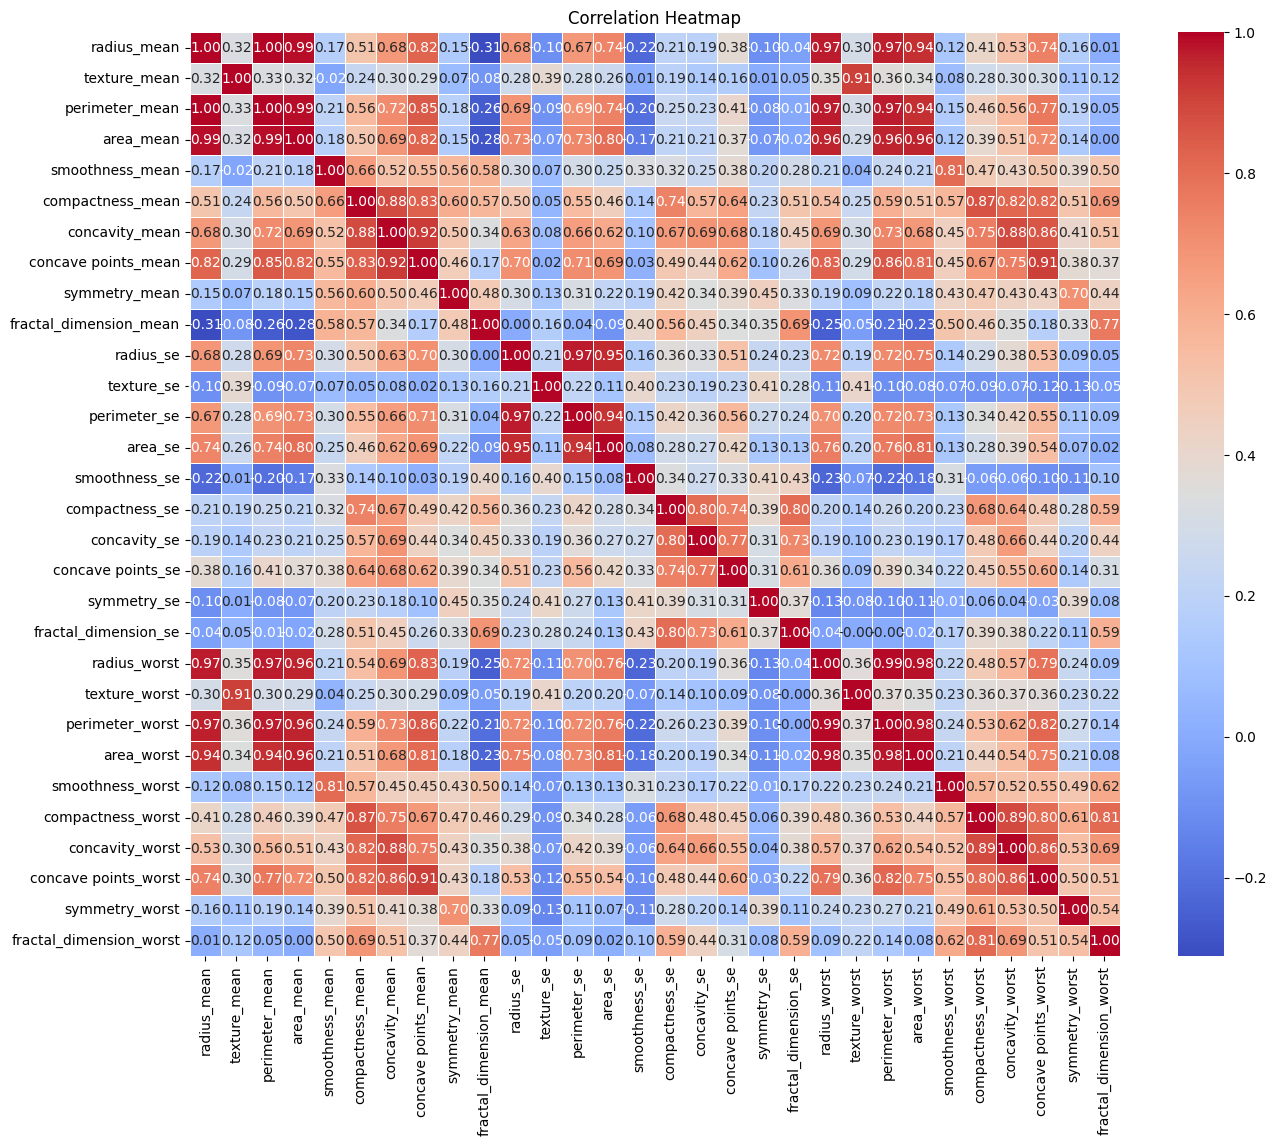

In [17]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

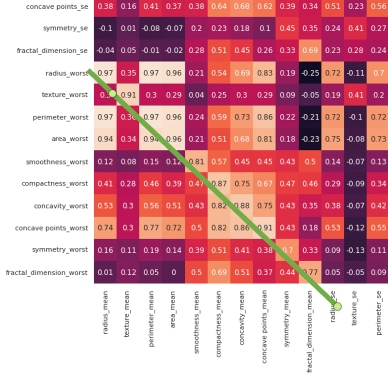

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [18]:
worst_cols = data_df.filter(like='_worst').columns
data_df.drop(columns=worst_cols, inplace=True)

In [19]:
data_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')

3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




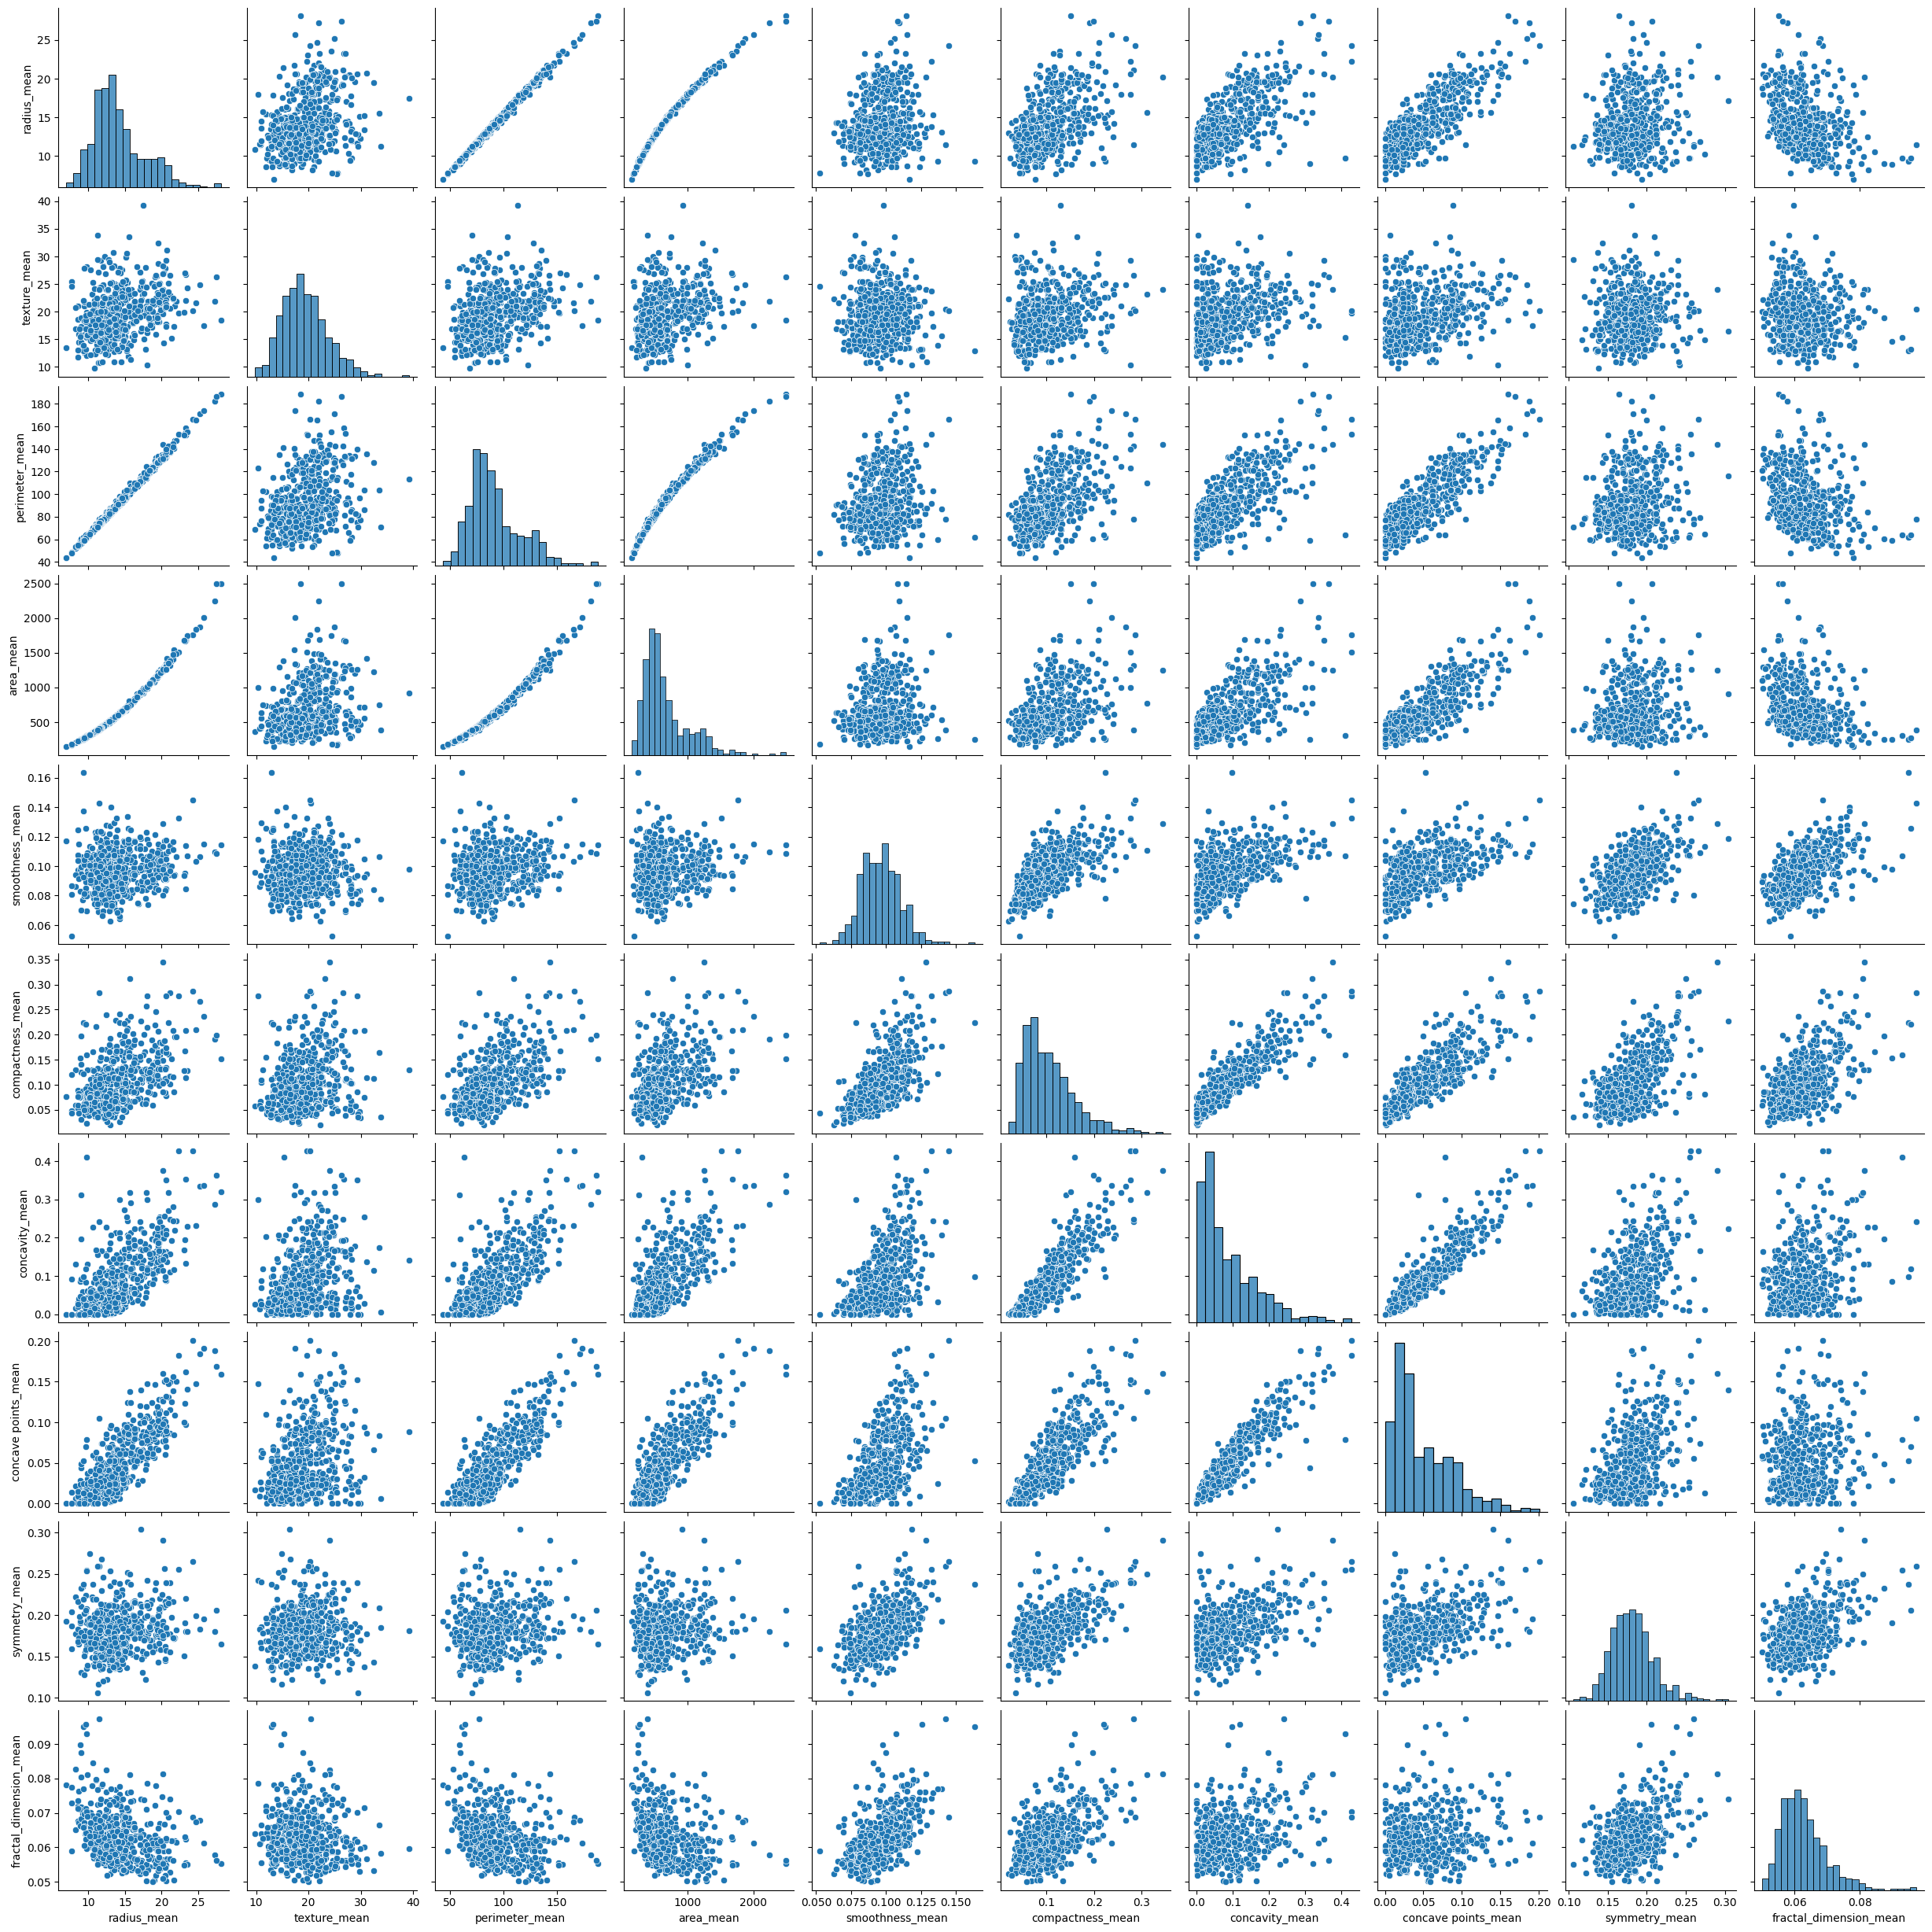

In [20]:
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
plt.show()

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


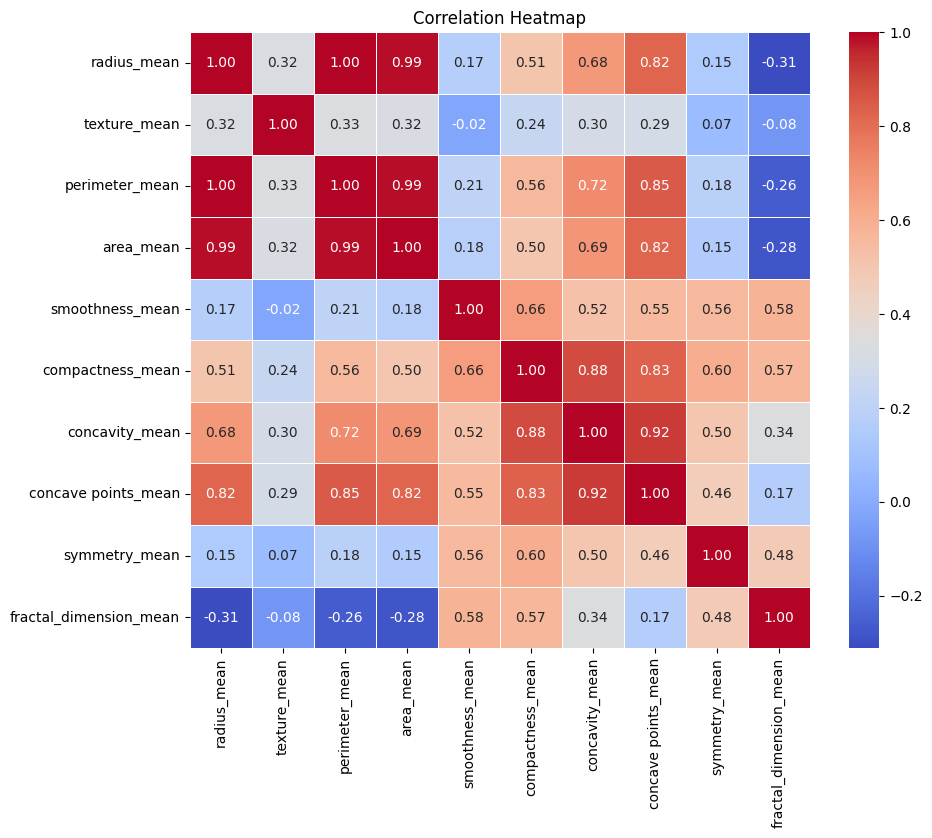

In [21]:
mean_columns = ['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']
mean_corr_matrix = data_df[mean_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(mean_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Correlación entre radius_mean, perimeter_mean y area_mean

*   radius_mean y perimeter_mean = 1.0
*   radius_mean y area_mean = 0.99

Correlación entre compactness_mean, concavity_mean, concave_points_mean


*   compactness_mean y concavity_mean = 0.88
*   compactness_mean y concave_points_mean = 0.83


3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [22]:
mean_cols = ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']
data_df.drop(columns=mean_cols, inplace=True)

In [23]:
se_cols = ['perimeter_se', 'area_se', 'concavity_se', 'concave points_se']
data_df.drop(columns=se_cols, inplace=True)

In [24]:
data_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

In [25]:
data_df.shape # 12 variables y 1 target

(569, 13)

Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

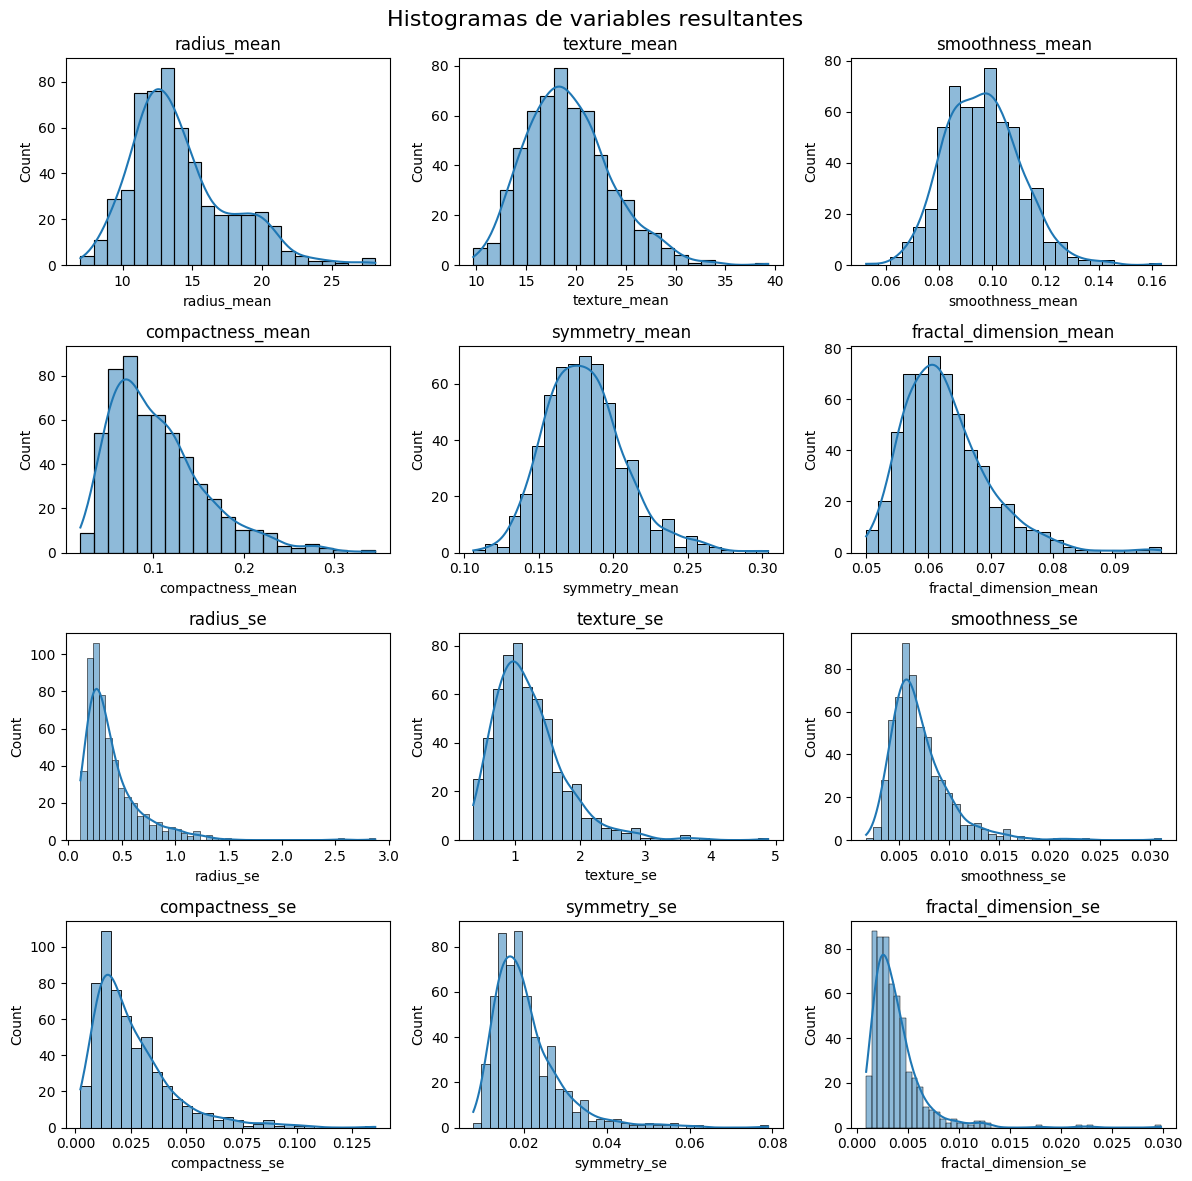

In [26]:
numeric_cols = data_df.select_dtypes(include='number').columns

plt.figure(figsize=(12, 12))
plt.suptitle('Histogramas de variables resultantes', fontsize=16)

for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(data_df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [27]:
# skewed variables columns
skewed_cols = data_df[numeric_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_cols

fractal_dimension_se      3.923969
radius_se                 3.088612
smoothness_se             2.314450
symmetry_se               2.195133
compactness_se            1.902221
texture_se                1.646444
fractal_dimension_mean    1.304489
compactness_mean          1.190123
radius_mean               0.942380
symmetry_mean             0.725609
texture_mean              0.650450
smoothness_mean           0.456324
dtype: float64

In [28]:
# Variables con sesgo positivo
skew_cols = skewed_cols[skewed_cols > 1].index.tolist()
skew_cols

['fractal_dimension_se',
 'radius_se',
 'smoothness_se',
 'symmetry_se',
 'compactness_se',
 'texture_se',
 'fractal_dimension_mean',
 'compactness_mean']

4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


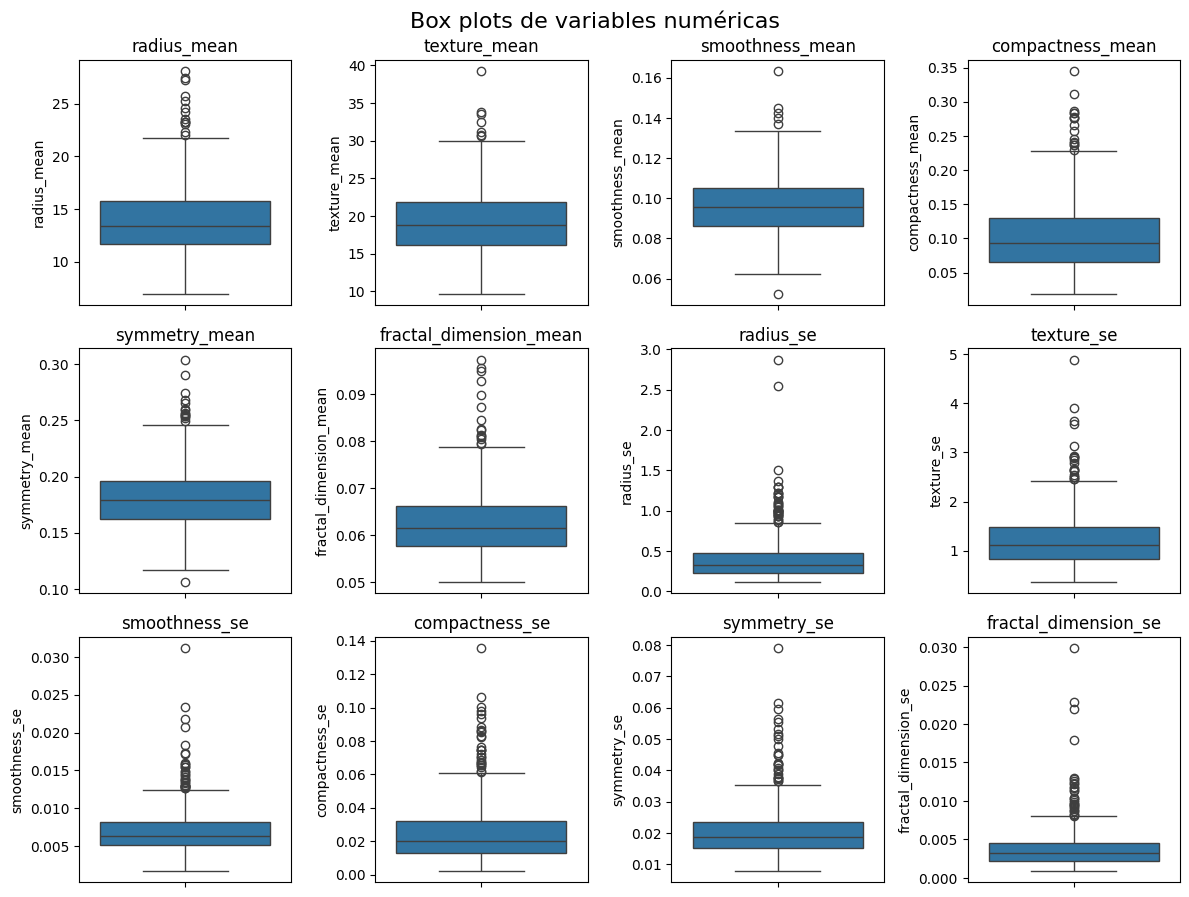

In [29]:
plt.figure(figsize=(12, 12))
plt.suptitle('Box plots de variables numéricas', fontsize=16)
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [30]:
#Variables que no se encuentran en el rango [0,1]
scale_cols = [col for col in data_df.select_dtypes(include='number') if data_df[col].min() < 0 or data_df[col].max() > 1]
scale_cols

['radius_mean', 'texture_mean', 'radius_se', 'texture_se']

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [31]:
df = pd.read_csv('data.csv')
df.set_index('id', inplace=True)

In [32]:
X = df.drop(columns='diagnosis')
y = df['diagnosis']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [34]:
print(f"Porcentaje de entrenamiento: {len(X_train)/len(X)*100:.2f}%")
print(f"Porcentaje de prueba: {len(X_test)/len(X)*100:.2f}%")

Porcentaje de entrenamiento: 79.96%
Porcentaje de prueba: 20.04%


5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [35]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    transformers=[
        ('_worst', 'drop', worst_cols),
        ('_se', 'drop', se_cols),
        ('_mean', 'drop', mean_cols),
    ],
    remainder='passthrough'
)

5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logr_model = Pipeline([
    ('preprocessing', preprocessing),
    ('logr_model', LogisticRegression(random_state=1))
])

In [37]:
logr_model.fit(X_train, y_train)

c:\Users\USER END\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('_worst', 'drop',
                                                  Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')),
                                                 ('_se', 'drop',
                                                  ['perimeter_se', 'area_se',
                                                   'concavity_se',
                                                   'concave points_se']),
                                                 ('_mean', 'drop',
                                                  ['perimeter_mean',
                                                   'area_mean',
                                                   'concavity_mean',
                                                   'concave points_mean'])])),
                ('logr_model', LogisticRegression(random_state=1))])

In [38]:
y_pred = logr_model.predict(X_test)

In [39]:
y_pred

array(['B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B'], dtype=object)

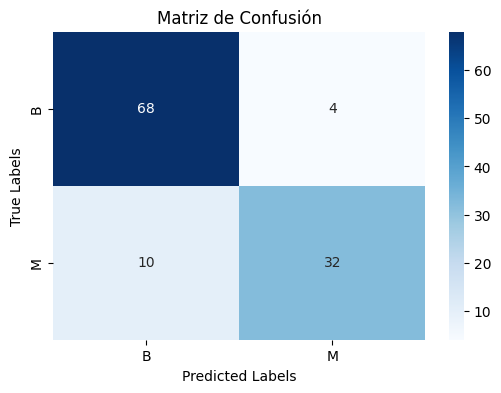

              precision    recall  f1-score   support

           B       0.87      0.94      0.91        72
           M       0.89      0.76      0.82        42

    accuracy                           0.88       114
   macro avg       0.88      0.85      0.86       114
weighted avg       0.88      0.88      0.87       114



In [40]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

# print(confusion_matrix)
print(classification_report(y_test, y_pred, target_names=['B', 'M']))

In [41]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')

Accuracy: 0.877
Precision: 0.889
Recall: 0.762


Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [42]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler

preprocessing = ColumnTransformer(
    transformers=[
        ('_worst', 'drop', worst_cols),
        ('_mean', 'drop', mean_cols),
        ('_se', 'drop', se_cols),
        ('sqrt', FunctionTransformer(np.sqrt), skew_cols),
        ('minmax', MinMaxScaler(), scale_cols)
    ],
    remainder='passthrough'
)

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [43]:
logr_model2 = Pipeline([
    ('preprocessing', preprocessing),
    ('logr_model', LogisticRegression(random_state=1))
])

In [44]:
logr_model2.fit(X_train, y_train)

c:\Users\USER END\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('_worst', 'drop',
                                                  Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')),
                                                 ('_mean', 'drop',
                                                  ['perimeter_mean',
                                                   '...
                                                   'concavity_se',
                                                   'concave points_se']),
                                                 ('sqrt',
                                                  FunctionTransformer(func=<ufunc 'sqrt'>),
                                                  ['fractal_dimension_se',
                                                   'radius_se', 'smoothness_se',
                                                   'symmetry_se',
                                                   'compactness_se',
                                                   'texture_se',
                                                   'fractal_dimension_mean',
                                                   'compactness_mean']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['radius_mean',
                                                   'texture_mean', 'radius_se',
                                                   'texture_se'])])),
                ('logr_model', LogisticRegression(random_state=1))])

In [45]:
y_pred2 = logr_model2.predict(X_test)

In [46]:
y_pred2

array(['B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B'], dtype=object)

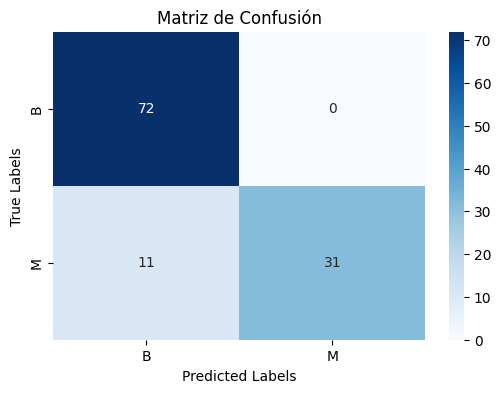

              precision    recall  f1-score   support

           B       0.87      1.00      0.93        72
           M       1.00      0.74      0.85        42

    accuracy                           0.90       114
   macro avg       0.93      0.87      0.89       114
weighted avg       0.92      0.90      0.90       114



In [47]:
from sklearn.metrics import confusion_matrix as cm, classification_report, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix = cm(y_test, y_pred2, labels=['B', 'M'])
# print(confusion_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

print(classification_report(y_test, y_pred2))

In [48]:
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2, pos_label='M')
recall2 = recall_score(y_test, y_pred2, pos_label='M')

print(f'Accuracy: {accuracy2:.3f}')
print(f'Recall: {recall2:.3f}')
print(f'Precision: {precision2:.3f}')

Accuracy: 0.904
Recall: 0.738
Precision: 1.000


# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_scaled)

print(f'Número de componentes: {pca.n_components_}')

Número de componentes: 17


In [51]:
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
varianza_acumulada

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018])

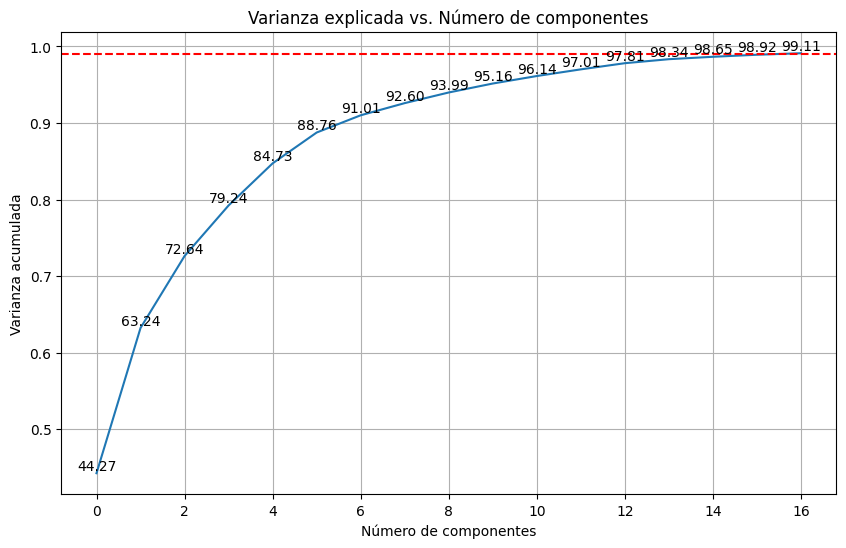

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(varianza_acumulada)
plt.xlabel('Número de componentes')
# ajustar eje x para iniciar en 1
plt.ylabel('Varianza acumulada')
plt.title('Varianza explicada vs. Número de componentes')
plt.grid()
plt.axhline(y=0.99, color='r', linestyle='--')

labels = varianza_acumulada * 100

for i in range(pca.n_components_):
    plt.text(i, varianza_acumulada[i], f'{labels[i]:.2f}', ha='center', va='bottom')

plt.show()

In [53]:
n_components = np.argmax(varianza_acumulada >= 0.99) + 1
print(f"Se necesitan {n_components} componentes para explicar más del 99% de la varianza")

Se necesitan 17 componentes para explicar más del 99% de la varianza


9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [54]:
logr_model3 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('logr_model3', LogisticRegression(random_state=1))
])

In [55]:
logr_model3.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=np.int64(17))),
                ('logr_model3', LogisticRegression(random_state=1))])

In [56]:
y_pred3 = logr_model3.predict(X_test)

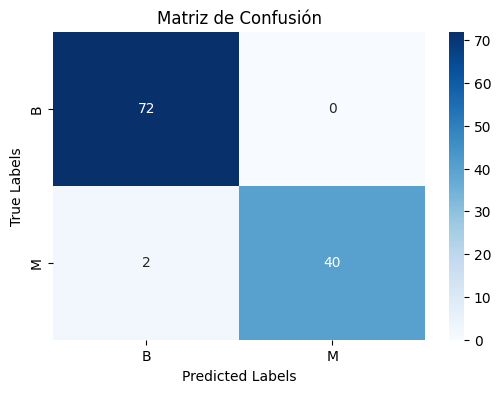

              precision    recall  f1-score   support

           B       0.97      1.00      0.99        72
           M       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [57]:
from sklearn.metrics import confusion_matrix as confmtx
confusion_matrix = confmtx(y_test, y_pred3, labels=['B', 'M'])
# print(confusion_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

print(classification_report(y_test, y_pred3))

In [58]:
accuracy3 = accuracy_score(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3, pos_label='M')
recall3 = recall_score(y_test, y_pred3, pos_label='M')

print(f'Accuracy: {accuracy3:.2f}')
print(f'Precision: {precision3:.2f}')
print(f'Recall: {recall3:.2f}')

Accuracy: 0.98
Precision: 1.00
Recall: 0.95


10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?

Recall (sensitivity o True Positive Rate) es una métrica que mide la proporción de positivos reales que fueron correctamente clasificados. Por lo anterior, consideramos que recall es una métrica importante en un contexto clínico de diagnóstico, donde un falso negativo (decir que un paciente enfermo está sano) puede tener consecuencias significativas sobre un falso positivo (decir que un paciente sano está enfermo).

El ajuste del threshold puede ser una decisión crítica dependiendo del contexto y el estudio médico a realizar, debido a los altos costos que pueden implicar algunos tratamientos, como lo es el cáncer de mama. El recall disminuye conforme se aumente el threshold y viceversa.

En general, creemos que es importante encontrar un equilibrio entre la sensibilidad y especificidad, ya que un alto número de falsos positivos puede llevar a procedimientos innecesarios y que podrían tener un efecto adverso sobre la salud del paciente. Por otra parte, las detecciones de falsos negativos pueden ocasionar que el tratamiento se incorpore de forma tardía en etapas avanzadas, donde puede que el tratamiento no sea igual de efectivo.